You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset_path = "Logistic_Regression_dataset/"
x_l = np.load(dataset_path+"X.npy") # image
y_l = np.load(dataset_path+"Y.npy") # label

y_l = np.argwhere(y_l==1)
x_l = x_l.astype(np.float64).reshape(-1,64*64)
scaler = StandardScaler().fit(x_l)
x_l = scaler.transform(x_l)

trainX, testX, trainy, testy = train_test_split(x_l, y_l[:,1:2].reshape(y_l.shape[0]), test_size=0.3, random_state=13)

(2062, 4096)
(2062, 2)
0
(1443, 4096) (619, 4096) (1443,) (619,)
s  144
s  143
s  150
s  141
s  142
s  145
s  145
s  143
s  145
s  145


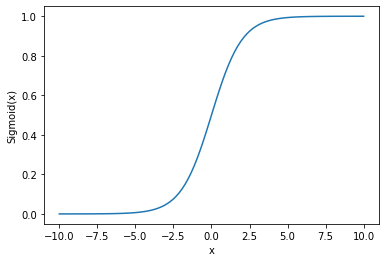

In [5]:
print(x_l.shape)
print(y_l.shape)
print(testy[np.argmin(testy)])
# plt.figure()
# f, axarr = plt.subplots(5,1)
# for i in range(5):
#     axarr[i].imshow(x_l[i+2000])
#     print(y_l[i+2000])
%matplotlib inline
print(trainX.shape,testX.shape,trainy.shape, testy.shape)
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-10, 10, 100) 
y = sigmoid(x)
plt.plot(x,y)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")

for i in range(10):
    print("s ",(trainy==i).sum())

* The above plotted sigmoid function is used for binary classification.
* To perform multi-class classification, we have to strategies as follows:
    - **One vs One:** For n classes, we have nC2 classifiers, i.e. all permutations of the classes. Then we pick according to overall prediction of them
    
    - **One vs All:** For n classes, here we have n classifiers like this, 1st class vs all others, 2nd class vs all others and so on.

In [10]:
def diff_g(w,x,y):
    y_minus_sigmoid_wtx = sigmoid(np.dot(x,w)) - y
    return np.dot(x.T,y_minus_sigmoid_wtx)

def gradient_descent(x,y, num_iterations = 2000, learning_rate = 0.02):
    w = np.zeros(x.shape[1])
#     print(w.shape)
    for i in range(num_iterations):
        w = w - (learning_rate * diff_g(w,x,y))
    return w

def get_w_after_training(x,y):
    x = x/255.0
    x = np.c_[x, np.ones(x.shape[0])]
#     print(x.shape)
    return gradient_descent(x,y)

def predict(w,x):
    x = np.c_[x, np.ones(x.shape[0])]
    sigm = sigmoid(np.dot(w.T,x.T))
    sigm[sigm > 0.5] = 1
    sigm[sigm <= 0.5] = 0
    return sigm

In [7]:
def get_data_with_given_labels_two_at_a_time(l1,l2):
    temp_indices = np.argwhere((trainy==l1) | (trainy==l2))
    temp_trainy = trainy[temp_indices]
    temp_trainy = temp_trainy.reshape(temp_trainy.shape[0])
    temp_trainX = trainX[temp_indices]
    temp_trainX = temp_trainX.reshape(temp_trainX.shape[0],temp_trainX.shape[2])
    temp_trainy[temp_trainy==l1] = 0
    temp_trainy[temp_trainy==l2] = 1

#     temp_indices = np.argwhere((testy==l1) | (testy==l2))
#     temp_testy = testy[temp_indices]
#     temp_testy = temp_testy.reshape(temp_testy.shape[0])
#     temp_testX = testX[temp_indices]
#     temp_testX = temp_testX.reshape(temp_testX.shape[0],temp_testX.shape[2])
#     temp_testy[temp_testy==l1] = 0
#     temp_testy[temp_testy==l2] = 1
    return temp_trainX, temp_trainy

def predict_using_one_vs_one():
    w_classifiers = []
    predicted_labels_for_each_classifier = []
    for i in range(10):
        for j in range(i+1,10):
            print("Building classifier ",i,j)
            temp_trainX, temp_trainy = get_data_with_given_labels_two_at_a_time(i,j)
            w_obtained = get_w_after_training(temp_trainX,temp_trainy)
            w_classifiers.append(w_obtained)
            pred = predict(w_obtained,testX)
            pred[pred==0] = i
            pred[pred==1] = j
            predicted_labels_for_each_classifier.append(pred)
    ans = np.zeros(testX.shape[0])
    predicted_labels_for_each_classifier = np.array(predicted_labels_for_each_classifier,dtype= int)
    for i in range(ans.shape[0]):
        ans[i] = np.argmax(np.bincount(predicted_labels_for_each_classifier[:,i]))
    return ans, predicted_labels_for_each_classifier

In [8]:
predicted_one_vs_one, temp_debugging = predict_using_one_vs_one()
predicted_one_vs_one

Building classifier  0 1


<ipython-input-5-cf32105af97e>:12: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Building classifier  0 2
Building classifier  0 3
Building classifier  0 4
Building classifier  0 5
Building classifier  0 6
Building classifier  0 7
Building classifier  0 8
Building classifier  0 9
Building classifier  1 2
Building classifier  1 3
Building classifier  1 4
Building classifier  1 5
Building classifier  1 6
Building classifier  1 7
Building classifier  1 8
Building classifier  1 9
Building classifier  2 3
Building classifier  2 4
Building classifier  2 5
Building classifier  2 6
Building classifier  2 7
Building classifier  2 8
Building classifier  2 9
Building classifier  3 4
Building classifier  3 5
Building classifier  3 6
Building classifier  3 7
Building classifier  3 8
Building classifier  3 9
Building classifier  4 5
Building classifier  4 6
Building classifier  4 7
Building classifier  4 8
Building classifier  4 9
Building classifier  5 6
Building classifier  5 7
Building classifier  5 8
Building classifier  5 9
Building classifier  6 7
Building classifier  6 8


array([0., 9., 0., 4., 9., 3., 7., 6., 4., 4., 9., 0., 0., 3., 7., 9., 2.,
       2., 4., 5., 9., 5., 2., 8., 5., 7., 3., 4., 5., 7., 4., 7., 8., 0.,
       4., 5., 8., 6., 4., 4., 2., 0., 7., 8., 9., 2., 2., 4., 4., 0., 3.,
       0., 7., 4., 7., 0., 7., 9., 0., 7., 0., 3., 0., 0., 4., 9., 3., 8.,
       4., 8., 9., 0., 2., 2., 4., 2., 9., 2., 3., 9., 4., 7., 7., 4., 8.,
       3., 3., 5., 4., 5., 5., 3., 9., 7., 2., 4., 3., 9., 0., 3., 4., 7.,
       4., 4., 0., 3., 9., 8., 2., 4., 4., 4., 9., 5., 3., 8., 4., 3., 6.,
       5., 7., 3., 7., 8., 8., 0., 3., 4., 3., 8., 7., 7., 8., 0., 9., 4.,
       2., 4., 4., 9., 5., 0., 5., 2., 9., 4., 4., 6., 6., 4., 6., 7., 3.,
       8., 5., 4., 2., 5., 3., 8., 8., 5., 3., 0., 8., 0., 7., 5., 4., 3.,
       0., 4., 0., 0., 9., 7., 4., 9., 4., 7., 9., 3., 5., 7., 8., 0., 0.,
       9., 5., 0., 4., 4., 6., 0., 6., 7., 7., 3., 9., 4., 0., 7., 2., 6.,
       5., 7., 5., 6., 8., 9., 9., 5., 8., 3., 6., 4., 2., 8., 9., 2., 4.,
       0., 7., 3., 9., 8.

In [9]:
accuracy_oneVsone = (testy==predicted_one_vs_one).mean()*100
print("Accuracy = ",accuracy_oneVsone,"%")

Accuracy =  68.33602584814217 %


In [13]:
def get_data_with_given_label(i):
    temp_trainy = np.copy(trainy)
    indices_i = (temp_trainy==i)
    temp_trainy[indices_i] = 0
    temp_trainy[~indices_i] = 1
#     print(indices_i)
    return temp_trainy

def predict_using_one_vs_all():
    w_classifiers = []
    for i in range(10):
        print("Building classifier #",i)
        temp_trainy = get_data_with_given_label(i)
        w_obtained = get_w_after_training(trainX,temp_trainy)
        w_classifiers.append(w_obtained)
    w_classifiers = np.array(w_classifiers)
    tempx = np.c_[testX, np.ones(testX.shape[0])]
    pred = sigmoid(np.dot(w_classifiers,tempx.T))
    return pred.argmin(axis=0)

In [14]:
predicted_one_vs_all = predict_using_one_vs_all()

Building classifier # 0
Building classifier # 1
Building classifier # 2
Building classifier # 3
Building classifier # 4
Building classifier # 5
Building classifier # 6
Building classifier # 7
Building classifier # 8
Building classifier # 9


<ipython-input-5-cf32105af97e>:12: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [15]:
accuracy_oneVsall = (testy==predicted_one_vs_all).mean()*100
print("Accuracy One vs All = ",accuracy_oneVsall,"%")

Accuracy One vs All =  74.63651050080774 %


### Scikit learn Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

# print(trainX.shape)
# print(trainy.shape)
# print(testX.shape)
# print(testy.shape)
# plt.imshow(trainX[2].reshape(64,64))
# print(trainy[2])

clf = LogisticRegression(max_iter=1000)
clf.fit(trainX, trainy)

LogisticRegression(max_iter=1000)

In [17]:
accuracy_sklearn = clf.score(testX,testy)*100
print(accuracy_sklearn)
# predicted_sklearn = clf.predict(testX)
# (testy==predicted_sklearn).mean()

76.09046849757674


### Comparison metrics for the 3 methods

In [18]:
from prettytable import PrettyTable

l = [["Accuracy",accuracy_oneVsone,accuracy_oneVsall,accuracy_sklearn]]
# Heat map, confusion matrix
table = PrettyTable(['Performance metric','Log. Reg. One vs One', 'Log. Reg. One vs All', 'Sklearn Log. Reg.'])

for rec in l:
    table.add_row(rec)
    
print(table)

+--------------------+----------------------+----------------------+-------------------+
| Performance metric | Log. Reg. One vs One | Log. Reg. One vs All | Sklearn Log. Reg. |
+--------------------+----------------------+----------------------+-------------------+
|      Accuracy      |  68.33602584814217   |  74.63651050080774   | 76.09046849757674 |
+--------------------+----------------------+----------------------+-------------------+


### Some plots and there labels

In [25]:
def show_true_and_predicted(i):
    plt.imshow(testX[i].reshape(64,64))
    plt.title("Real: "+str(testy[i])+" Predicted: "+str(predicted_one_vs_all[i]))

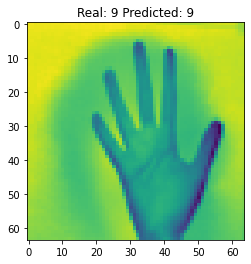

In [29]:
show_true_and_predicted(0)

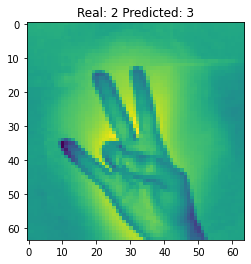

In [30]:
show_true_and_predicted(9)

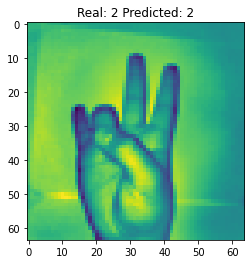

In [32]:
show_true_and_predicted(16)

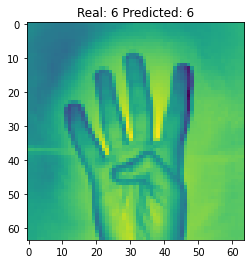

In [33]:
show_true_and_predicted(150)